<a href="https://colab.research.google.com/github/jennychen0223/Minst_Handwriting-Recognition_API/blob/main/%E3%80%8CMinst_model__ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf

In [2]:
print(tf.__version__)

2.5.0


In [3]:
! /opt/bin/nvidia-smi

Mon Aug  2 17:07:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
 (x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
y_train[0]

5

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

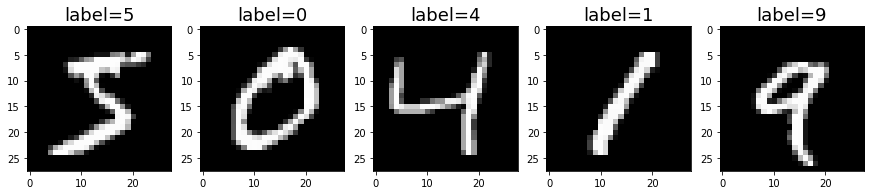

In [7]:
#畫出MNIST圖片

import matplotlib.pyplot as plt

plt.gcf().set_size_inches(15,4)
for i in range(5):
  ax = plt.subplot(1,5,i+1)
  ax.imshow(x_train[i],cmap='gray') #cmap='binary'會白底黑字
  ax.set_title('label='+str(y_train[i]),fontsize=18)
plt.show()

In [8]:
#標準化
x_train = x_train/255
x_test = x_test/255

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000,28,28,1))

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

In [14]:
CNN = keras.Sequential(name = 'CNNNetwork') #model名稱:CNN

兩次convalution兩次pooling

In [15]:
CNN.add(layers.Conv2D(filters=32, 
                      kernel_size=(3,3),
                      activation='relu',
                      padding='same',
                      input_shape=(28, 28, 1) #第一層才要給
        ))

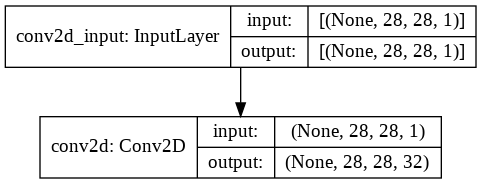

In [16]:
keras.utils.plot_model(CNN, show_shapes=True)

In [17]:
CNN.add(layers.MaxPooling2D(2,2))

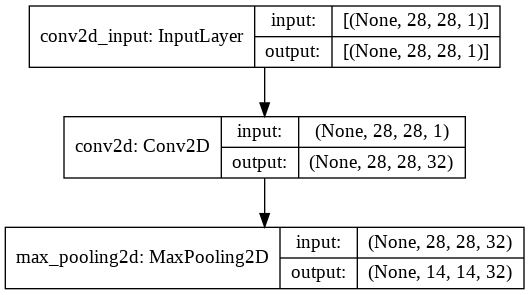

In [18]:
keras.utils.plot_model(CNN,show_shapes=True)

In [19]:
CNN.add(layers.Conv2D(filters=64,
                           kernel_size=(3,3),
                           #padding='same', #故意不加
                           activation='relu'))
CNN.add(layers.MaxPooling2D(2,2))

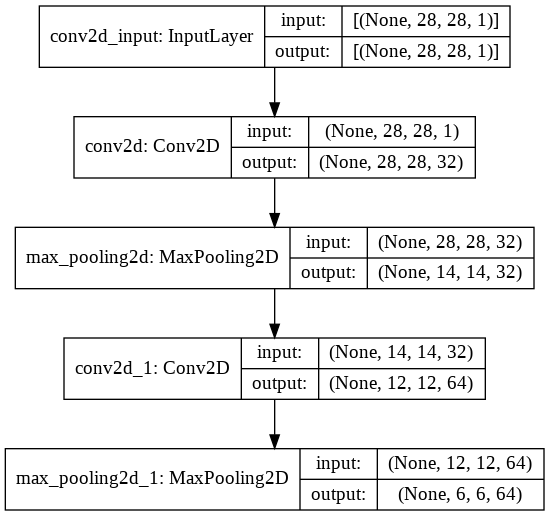

In [20]:
keras.utils.plot_model(CNN,show_shapes=True)

In [21]:
print(CNN.summary())

Model: "CNNNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
Total params: 18,816
Trainable params: 18,816
Non-trainable params: 0
_________________________________________________________________
None


 - 320 = ((3x3x1)+1)x32
 - 3x3 : filter size
 - x1 (28x28x1)
 - +1 bias
 - 32個filter


18496 = ((3x3x32)+1)x64
 - 3x3 : filter size
 - 32 : 14x14x32 
 - +1 bias
 - 64 filter



In [22]:
CNN.add(layers.Flatten())
CNN.add(layers.Dense(128,activation='relu'))
CNN.add(layers.Dense(64,activation='relu'))
CNN.add(layers.Dense(10,activation='softmax')) #最後一層,10:配合資料類別數量 0,1,2,3,4,5,6,7,8,9


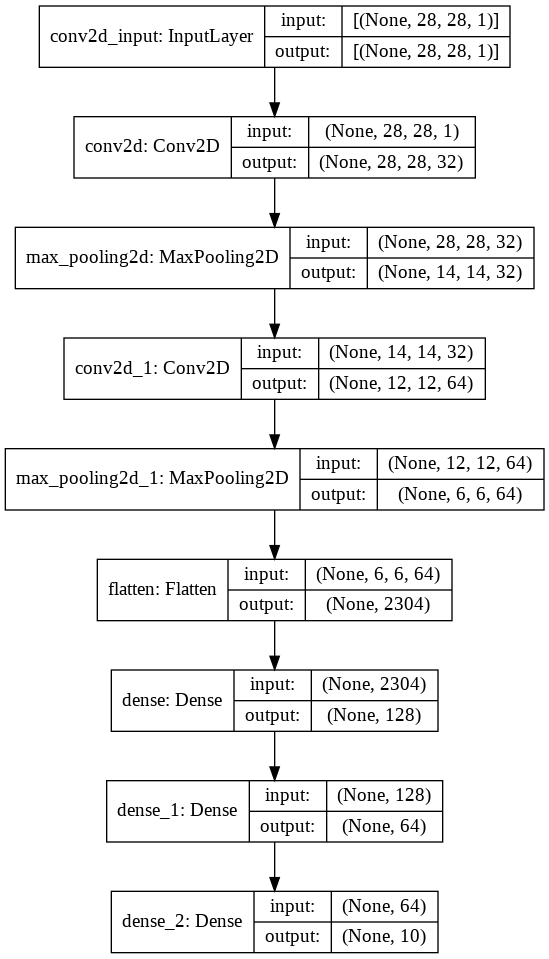

In [23]:
keras.utils.plot_model(CNN,show_shapes=True)

In [24]:
print(CNN.summary())

Model: "CNNNetwork"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2304)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               295040    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8

 #參數解釋
 - 2304 = 6x6x64
 - 295040 = (2304+1)x128
 - 8256 = (128+1)x64
 - 650 = (64+1)x10

In [25]:
CNN.compile(optimizer='Adam', 
            loss=keras.losses.sparse_categorical_crossentropy, 
            metrics=['accuracy'])

In [26]:
train_history = CNN.fit(x=x_train,
                        y=y_train,
                        validation_split=0.2, #分2/8分
                        epochs=20, #訓練20次
                        batch_size=300, #跑300張之後更新一次weight
                        verbose=2 #訓練的狀況顯示方式
                        )

Epoch 1/20
160/160 - 32s - loss: 0.3864 - accuracy: 0.8840 - val_loss: 0.1233 - val_accuracy: 0.9632
Epoch 2/20
160/160 - 1s - loss: 0.0862 - accuracy: 0.9736 - val_loss: 0.0695 - val_accuracy: 0.9799
Epoch 3/20
160/160 - 1s - loss: 0.0560 - accuracy: 0.9829 - val_loss: 0.0608 - val_accuracy: 0.9821
Epoch 4/20
160/160 - 1s - loss: 0.0471 - accuracy: 0.9854 - val_loss: 0.0515 - val_accuracy: 0.9845
Epoch 5/20
160/160 - 1s - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0520 - val_accuracy: 0.9847
Epoch 6/20
160/160 - 1s - loss: 0.0299 - accuracy: 0.9908 - val_loss: 0.0436 - val_accuracy: 0.9873
Epoch 7/20
160/160 - 1s - loss: 0.0236 - accuracy: 0.9923 - val_loss: 0.0394 - val_accuracy: 0.9882
Epoch 8/20
160/160 - 1s - loss: 0.0201 - accuracy: 0.9935 - val_loss: 0.0399 - val_accuracy: 0.9892
Epoch 9/20
160/160 - 1s - loss: 0.0196 - accuracy: 0.9936 - val_loss: 0.0521 - val_accuracy: 0.9865
Epoch 10/20
160/160 - 1s - loss: 0.0140 - accuracy: 0.9953 - val_loss: 0.0386 - val_accuracy: 0.990

In [27]:
scores = CNN.evaluate(x_test, y_test)
print('\n準確率=', scores[1])

313/313 [==============================] - 1s 3ms/step - loss: 0.0371 - accuracy: 0.9891

準確率= 0.9890999794006348


In [28]:
#分析訓練結果圖
import matplotlib.pyplot as plt
def show_train_history(show_train_value,test_value):
    plt.plot(train_history.history[show_train_value])
    plt.plot(train_history.history[test_value])
    plt.title('Train History')
    plt.ylabel(show_train_value)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

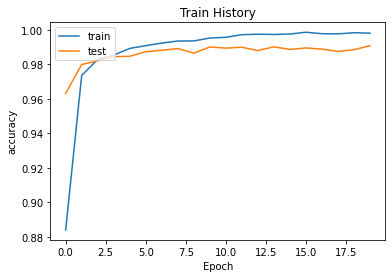

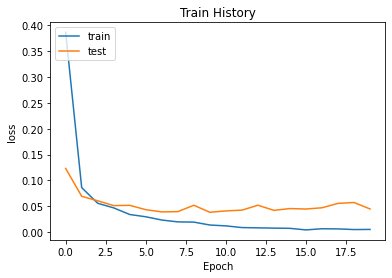

In [29]:
show_train_history('accuracy','val_accuracy')
show_train_history('loss','val_loss')

In [51]:
prediction = CNN.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [50]:
def show_images_labels_predictions(images, labels, predictions, start_id, num=10):
  plt.gcf().set_size_inches(12, 14)
  if num>25: num=25
  for i in range(0, num):
    #顯示黑白圖片
    ax = plt.subplot(5, 5, 1+i)
    ax.imshow(images[start_id], cmap="binary")

    #顯示預測結果
    if (len(predictions)>0):
      title = "ai="+ str(predictions[i])
      #預測正確顯示：o / 預測錯誤顯示：x
      title += ('(o)' if predictions[i] == labels[i] else '(x)')
      title += '\nlabel = '+ str(labels[i])

      #無預測結果，只在標題顯示真實數值
    else:
      title = 'label = '+ str(labels[i])

    #x, y 軸顯示刻度
    ax.set_title(title, fontsize = 12)
    ax.set_xticks([]); ax.set_yticks([])
    start_id += 1
  plt.show()

In [48]:
show_images_labels_predictions

NameError: ignored

In [30]:
import numpy as np
np.mean(CNN.predict_classes(x_test)==y_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9891

In [31]:
prediction = np.argmax(CNN.predict(x_test), axis = -1)

In [32]:
CNN.predict(x_test).shape

(10000, 10)

In [33]:
import pandas as pd

In [34]:
pd.crosstab(y_test,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,980,0,0,0,0,0,0,0,0,0
1,4,1114,3,1,1,1,5,4,2,0
2,2,0,1023,0,1,0,0,6,0,0
3,1,0,1,998,0,4,0,3,3,0
4,0,0,1,0,970,0,1,2,2,6
5,2,0,0,3,0,885,1,0,1,0
6,4,1,0,0,1,4,947,0,1,0
7,0,0,4,0,1,0,0,1019,1,3
8,3,0,2,0,0,1,1,1,965,1


In [35]:
#畫出來比對用的
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25
    images = images.reshape(images.shape[0],28,28)
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')

        ax.set_title("label=" +str(labels[idx])+
                     ",predict="+str(prediction[idx])
                     ,fontsize=10,color='red') 
        
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

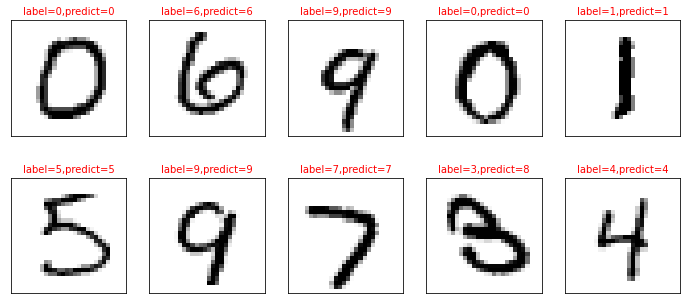

In [36]:
plot_images_labels_prediction(x_test,y_test,prediction,idx=10)

找出預測錯誤問題

In [37]:
df = pd.DataFrame({
    'label':y_test,
    'predict':prediction
})

In [38]:
df.head()

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [39]:
df[ (df.label == 4) & (df.predict == 9) ]


,label,predict
740,4,9
1242,4,9
2053,4,9
2130,4,9
5936,4,9
8520,4,9


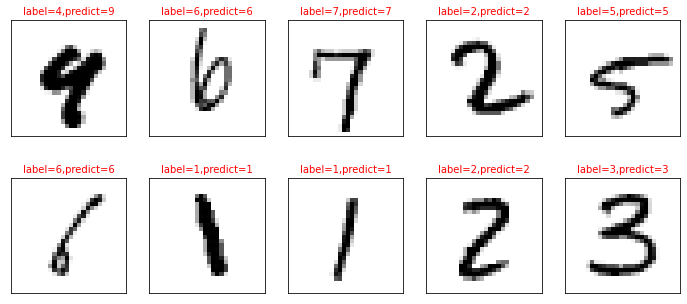

In [40]:
plot_images_labels_prediction(x_test,y_test,prediction,idx=2130)

In [41]:
CNN.save('MyMinistModel.h5')

In [42]:
!pwd

/content


In [43]:
from tensorflow.keras.models import load_model
model = load_model('MyMinistModel.h5')

In [44]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()

In [45]:
x_test.shape

(10000, 28, 28)

In [46]:
x_test = x_test/255
x_test = x_test.reshape(10000, 28, 28, 1)


In [47]:
model.evaluate(x_test,y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0371 - accuracy: 0.9891


0.9890999794006348